# **Formula 1 Race Prediction**

### **Tasks**: -

*   Determine relevant features related to formula 1 race prediction to identify the winner.

*    Design novel feature selection framework or use the existing techniques with proper justifications to identify salient features of the given data.

*  Report the performance of different classification techniques on the training data to demonstrate that the proposed feature selection scheme is working well. 

*  Execute the best framework on the test data.


# Testing out with my data

In [ ]:
import csv,sys
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from six import StringIO  
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from scipy import sparse
import pandas as pd

In [ ]:
# View first 20 rows
from pandas import read_csv
x_train = read_csv('/content/f1_trainindata.csv') # this data is without podium data which i will fetch from "data" csv and append it to this  

x_train   

,Unnamed: 0,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,grid,...,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
0,0,1983,1,False,False,True,False,False,keke_rosberg,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1983,1,False,False,True,False,False,prost,2,...,0,0,0,1,0,0,0,0,0,0
2,2,1983,1,False,False,True,False,False,tambay,3,...,0,0,0,0,0,0,0,0,0,0
3,3,1983,1,False,False,True,False,False,piquet,4,...,0,0,0,0,0,0,0,0,0,0
4,4,1983,1,False,False,True,False,False,warwick,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13470,13470,2019,21,True,False,False,False,False,giovinazzi,16,...,0,0,0,0,0,0,0,0,0,0
13471,13471,2019,21,True,False,False,False,False,raikkonen,17,...,0,0,0,0,0,0,0,0,0,0
13472,13472,2019,21,True,False,False,False,False,russell,18,...,0,0,0,0,0,0,0,0,0,1
13473,13473,2019,21,True,False,False,False,False,kubica,19,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_test = read_csv("/content/f1_testdata.csv")
x_test

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,grid,driver_points,...,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
0,1998,1,True,False,False,False,False,hakkinen,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1998,1,True,False,False,False,False,coulthard,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1998,1,True,False,False,False,False,michael_schumacher,3,0,...,0,0,0,0,0,0,0,0,0,0
3,1998,1,True,False,False,False,False,villeneuve,4,0,...,0,0,0,0,0,0,0,0,0,1
4,1998,1,True,False,False,False,False,herbert,5,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2012,20,False,False,False,True,False,kovalainen,20,0,...,0,0,0,0,0,0,0,0,0,0
794,2012,20,False,False,False,True,False,glock,21,0,...,0,0,0,0,0,0,0,0,0,0
795,2012,20,False,False,False,True,False,pic,22,0,...,0,0,0,0,0,0,0,0,0,0
796,2012,20,False,False,False,True,False,karthikeyan,23,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = read_csv('/content/f1_trainlabel.csv')

y_train

,Unnamed: 0,podium
0,0,15
1,1,6
2,2,4
3,3,1
4,4,7
...,...,...
13470,13470,16
13471,13471,13
13472,13472,17
13473,13473,19


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13475 entries, 0 to 13474
Data columns (total 100 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 13475 non-null  int64  
 1   season                     13475 non-null  int64  
 2   round                      13475 non-null  int64  
 3   weather_warm               13475 non-null  bool   
 4   weather_cold               13475 non-null  bool   
 5   weather_dry                13475 non-null  bool   
 6   weather_wet                13475 non-null  bool   
 7   weather_cloudy             13475 non-null  bool   
 8   driver                     13475 non-null  object 
 9   grid                       13475 non-null  int64  
 10  driver_points              13475 non-null  int64  
 11  driver_wins                13475 non-null  int64  
 12  driver_standings_pos       13475 non-null  int64  
 13  constructor_points         13475 non-null  in

In [ ]:
len(x_train.columns)

100

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13475 entries, 0 to 13474
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  13475 non-null  int64
 1   podium      13475 non-null  int64
dtypes: int64(2)
memory usage: 210.7 KB


Some of our
 features in the data :-


1.   Circuit :- Categorical
2.   Weather :- Categorical
3.   Driver age :- Integer
4.  Grid Position :- Categorical
5. Driver wins :- Integer
6. Constructor points :- Integer
7. Constructor wins :- Integer
8. Constructor standings positions :- Categorical
9. Quaiifying time :- Integer


..... and many more




# Missing Values

In [ ]:

x_train.dtypes 

Unnamed: 0                int64
season                    int64
round                     int64
weather_warm               bool
weather_cold               bool
                          ...  
constructor_team_lotus    int64
constructor_toro_rosso    int64
constructor_toyota        int64
constructor_tyrrell       int64
constructor_williams      int64
Length: 100, dtype: object

In [ ]:

x_train.isnull().sum().sum() # No missing values in x_train

0

In [ ]:


y_train.isnull().sum().sum()# No missing values in y_train

0

In [ ]:

x_test.isnull().sum().sum() # No missing values in x_test

0

In [ ]:
y_train=y_train.drop(['Unnamed: 0'], axis=1)

In [ ]:
#x_train.drop(['driver'], axis = 1,inplace = True)
x_train

,Unnamed: 0,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,grid,...,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
0,0,1983,1,False,False,True,False,False,keke_rosberg,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1983,1,False,False,True,False,False,prost,2,...,0,0,0,1,0,0,0,0,0,0
2,2,1983,1,False,False,True,False,False,tambay,3,...,0,0,0,0,0,0,0,0,0,0
3,3,1983,1,False,False,True,False,False,piquet,4,...,0,0,0,0,0,0,0,0,0,0
4,4,1983,1,False,False,True,False,False,warwick,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13470,13470,2019,21,True,False,False,False,False,giovinazzi,16,...,0,0,0,0,0,0,0,0,0,0
13471,13471,2019,21,True,False,False,False,False,raikkonen,17,...,0,0,0,0,0,0,0,0,0,0
13472,13472,2019,21,True,False,False,False,False,russell,18,...,0,0,0,0,0,0,0,0,0,1
13473,13473,2019,21,True,False,False,False,False,kubica,19,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_train.drop('Unnamed: 0',axis = 1, inplace = True)

Modifying x_train

In [ ]:
x_train['qualifying_time'].describe()

count    13475.000000
mean         2.624557
std          8.335051
min        -76.959000
25%          1.014000
50%          2.147000
75%          3.621000
max        904.617000
Name: qualifying_time, dtype: float64

In [ ]:
count=0    #negative values observed
list=[]
for i in x_train['qualifying_time']:
  if i< 0:
    count+=1
    list.append(i)
    
count


196

In [ ]:
#making all negative values observed as positive
list2 = []
for i in x_train['qualifying_time']:
  i = i + 76.959000
  list2.append(i)

qual_time = pd.DataFrame(list2 , columns = ['qual_time'])
qual_time

,qual_time
0,76.959
1,77.105
2,77.191
3,77.547
4,77.639
...,...
13470,80.294
13471,80.563
13472,80.897
13473,81.416


In [ ]:
x_train

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,grid,driver_points,...,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
0,1983,1,False,False,True,False,False,keke_rosberg,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1983,1,False,False,True,False,False,prost,2,0,...,0,0,0,1,0,0,0,0,0,0
2,1983,1,False,False,True,False,False,tambay,3,0,...,0,0,0,0,0,0,0,0,0,0
3,1983,1,False,False,True,False,False,piquet,4,0,...,0,0,0,0,0,0,0,0,0,0
4,1983,1,False,False,True,False,False,warwick,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13470,2019,21,True,False,False,False,False,giovinazzi,16,14,...,0,0,0,0,0,0,0,0,0,0
13471,2019,21,True,False,False,False,False,raikkonen,17,43,...,0,0,0,0,0,0,0,0,0,0
13472,2019,21,True,False,False,False,False,russell,18,0,...,0,0,0,0,0,0,0,0,0,1
13473,2019,21,True,False,False,False,False,kubica,19,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_train = x_train.drop(['qualifying_time'], axis = 1)

In [ ]:
x_train = pd.concat([x_train, qual_time],axis =1)
x_train

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,grid,driver_points,...,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams,qual_time
0,1983,1,False,False,True,False,False,keke_rosberg,1,0,...,0,0,0,0,0,0,0,0,1,76.959
1,1983,1,False,False,True,False,False,prost,2,0,...,0,0,1,0,0,0,0,0,0,77.105
2,1983,1,False,False,True,False,False,tambay,3,0,...,0,0,0,0,0,0,0,0,0,77.191
3,1983,1,False,False,True,False,False,piquet,4,0,...,0,0,0,0,0,0,0,0,0,77.547
4,1983,1,False,False,True,False,False,warwick,5,0,...,0,0,0,0,0,0,0,0,0,77.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13470,2019,21,True,False,False,False,False,giovinazzi,16,14,...,0,0,0,0,0,0,0,0,0,80.294
13471,2019,21,True,False,False,False,False,raikkonen,17,43,...,0,0,0,0,0,0,0,0,0,80.563
13472,2019,21,True,False,False,False,False,russell,18,0,...,0,0,0,0,0,0,0,0,1,80.897
13473,2019,21,True,False,False,False,False,kubica,19,1,...,0,0,0,0,0,0,0,0,1,81.416


modifying x_test

In [ ]:
x_test['qualifying_time'].describe()

count    798.000000
mean       1.937279
std        2.797014
min      -23.880000
25%        0.861750
50%        1.672500
75%        3.289250
max        7.436000
Name: qualifying_time, dtype: float64

In [ ]:
list2 = []
for i in x_test['qualifying_time']:
  i = i +23.880000
  list2.append(i)

qual_time = pd.DataFrame(list2 , columns = ['qual_time'])
qual_time

,qual_time
0,23.880
1,23.923
2,24.637
3,24.789
4,25.254
...,...
793,28.508
794,28.930
795,29.526
796,30.998


In [ ]:
x_test = x_test.drop(['qualifying_time'], axis = 1)

In [ ]:
x_test = pd.concat([x_test, qual_time],axis =1)
x_test

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,grid,driver_points,...,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams,qual_time
0,1998,1,True,False,False,False,False,hakkinen,1,0,...,0,0,0,0,0,0,0,0,0,23.880
1,1998,1,True,False,False,False,False,coulthard,2,0,...,0,0,0,0,0,0,0,0,0,23.923
2,1998,1,True,False,False,False,False,michael_schumacher,3,0,...,0,0,0,0,0,0,0,0,0,24.637
3,1998,1,True,False,False,False,False,villeneuve,4,0,...,0,0,0,0,0,0,0,0,1,24.789
4,1998,1,True,False,False,False,False,herbert,5,0,...,0,0,0,1,0,0,0,0,0,25.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2012,20,False,False,False,True,False,kovalainen,20,0,...,0,0,0,0,0,0,0,0,0,28.508
794,2012,20,False,False,False,True,False,glock,21,0,...,0,0,0,0,0,0,0,0,0,28.930
795,2012,20,False,False,False,True,False,pic,22,0,...,0,0,0,0,0,0,0,0,0,29.526
796,2012,20,False,False,False,True,False,karthikeyan,23,0,...,0,0,0,0,0,0,0,0,0,30.998


#Distribution of the Data 

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
import matplotlib
import pandas as pd

Text(0, 0.5, 'Frequency')

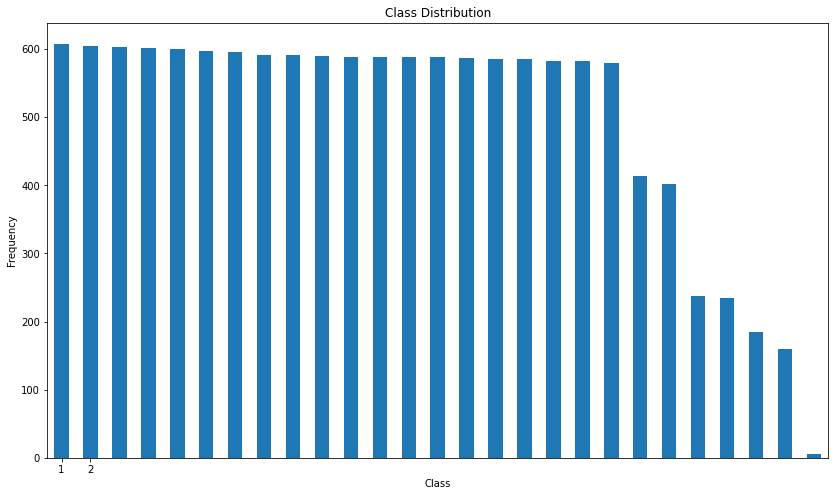

In [ ]:
count_classes = pd.value_counts(y_train['podium'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
count_classes

1     608
2     605
3     603
7     602
5     600
4     597
6     596
11    592
13    591
18    590
15    589
16    588
10    588
9     588
8     587
14    586
12    585
17    582
19    582
20    579
21    414
22    402
23    237
24    234
25    185
26    160
27      5
Name: podium, dtype: int64

#Feature Engineering




##Information gain

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [ ]:
x_train_temp = x_train.copy()

In [ ]:
x_train_temp =x_train_temp.drop('driver',axis =1)


In [ ]:
x_train_temp

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,driver_points,driver_wins,...,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams,qual_time
0,1983,1,False,False,True,False,False,1,0,0,...,0,0,0,0,0,0,0,0,1,76.959
1,1983,1,False,False,True,False,False,2,0,0,...,0,0,1,0,0,0,0,0,0,77.105
2,1983,1,False,False,True,False,False,3,0,0,...,0,0,0,0,0,0,0,0,0,77.191
3,1983,1,False,False,True,False,False,4,0,0,...,0,0,0,0,0,0,0,0,0,77.547
4,1983,1,False,False,True,False,False,5,0,0,...,0,0,0,0,0,0,0,0,0,77.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13470,2019,21,True,False,False,False,False,16,14,0,...,0,0,0,0,0,0,0,0,0,80.294
13471,2019,21,True,False,False,False,False,17,43,0,...,0,0,0,0,0,0,0,0,0,80.563
13472,2019,21,True,False,False,False,False,18,0,0,...,0,0,0,0,0,0,0,0,1,80.897
13473,2019,21,True,False,False,False,False,19,1,0,...,0,0,0,0,0,0,0,0,1,81.416


In [ ]:
mutual_info = mutual_info_classif(x_train_temp, y_train)
mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.15872032e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.33930923e-03, 1.14645610e-03, 0.00000000e+00, 2.60705629e-01,
       1.20803669e-01, 9.51309614e-02, 1.94176996e-01, 1.02741101e-01,
       1.21020710e-01, 1.91446718e-01, 1.20421795e-02, 6.09183248e-03,
       0.00000000e+00, 1.15703986e-02, 6.32247089e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.86668948e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.48632277e-02,
       0.00000000e+00, 0.00000000e+00, 7.08862500e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.28090078e-03, 8.39598976e-03,
       0.00000000e+00, 0.00000000e+00, 1.34742657e-02, 1.83110675e-03,
       2.45708135e-03, 1.61905412e-02, 0.00000000e+00, 7.67495573e-03,
       8.00725765e-03, 0.00000000e+00, 3.98500854e-03, 8.19363035e-03,
       4.29036842e-03, 9.51596204e-03, 1.54916462e-04, 0.00000000e+00,
      

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train_temp.columns
mutual_info.sort_values(ascending=False)

grid                         0.260706
driver_standings_pos         0.194177
constructor_standings_pos    0.191447
qual_time                    0.188471
constructor_wins             0.121021
                               ...   
round                        0.000000
nationality_American         0.000000
nationality_Australian       0.000000
nationality_Brazilian        0.000000
circuit_id_suzuka            0.000000
Length: 98, dtype: float64

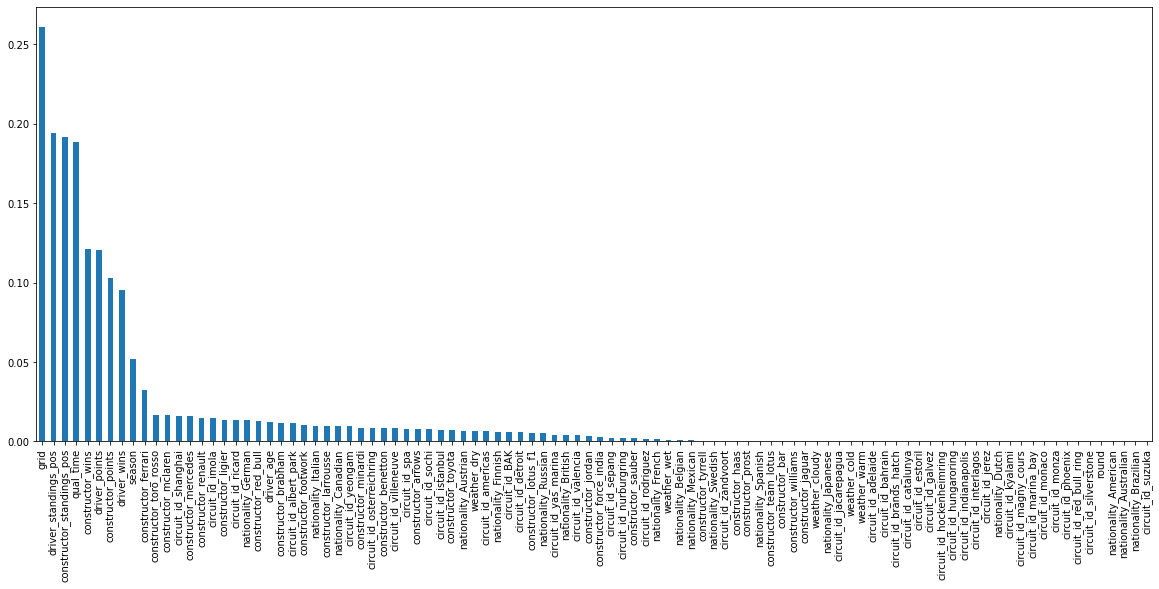

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
#No we Will select the  top 9 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=9)
sel_five_cols.fit(x_train_temp, y_train)
x_train_temp.columns[sel_five_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['season', 'grid', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qual_time'],
      dtype='object')

###Based On top 20 percentile

In [ ]:

## Selecting the top features within a 20 percentile of the best one 
selected_top_columns = SelectPercentile(mutual_info_classif, percentile=20)
selected_top_columns.fit(x_train_temp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_classif at 0x7f9ff0552ef0>)

In [ ]:
x_train_temp.columns[selected_top_columns.get_support()]

Index(['season', 'grid', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'circuit_id_suzuka', 'circuit_id_yeongam',
       'nationality_American', 'nationality_Italian', 'constructor_ferrari',
       'constructor_larrousse', 'constructor_mclaren', 'constructor_mercedes',
       'constructor_minardi', 'constructor_sauber', 'constructor_williams',
       'qual_time'],
      dtype='object')

##Correlation method

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
x_train_temp.corr()

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,driver_points,driver_wins,...,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams,qual_time
season,1.000000,0.146736,-0.070552,-0.136900,-0.179868,0.027506,0.129886,-0.155432,0.340813,0.057592,...,-0.012423,0.207652,0.102294,0.108226,-0.184581,0.208731,0.062994,-0.171786,0.026985,-0.082413
round,0.146736,1.000000,-0.038720,-0.021605,-0.052284,-0.026210,-0.001483,-0.019886,0.354322,0.195768,...,-0.006005,0.033316,0.016230,0.017360,-0.022436,0.027708,0.004176,-0.029121,0.004109,-0.001551
weather_warm,-0.070552,-0.038720,1.000000,-0.098299,-0.324342,-0.248370,-0.209782,0.021109,-0.027276,-0.012244,...,-0.043459,-0.006656,0.006558,-0.026401,0.026376,-0.005390,0.013273,0.018092,-0.003271,-0.001957
weather_cold,-0.136900,-0.021605,-0.098299,1.000000,-0.079738,0.174708,0.028889,0.028526,-0.039571,-0.008379,...,-0.003883,-0.023114,-0.020848,-0.028765,0.024350,-0.021622,-0.013092,0.025908,-0.004755,0.019764
weather_dry,-0.179868,-0.052284,-0.324342,-0.079738,1.000000,0.038491,-0.074727,0.015431,-0.072967,-0.012046,...,0.035678,-0.036638,-0.011694,-0.007410,0.022353,-0.040352,-0.013966,0.024121,-0.002518,0.010017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
constructor_toro_rosso,0.208731,0.027708,-0.005390,-0.021622,-0.040352,0.009366,0.022625,0.043189,-0.042374,-0.056703,...,-0.018855,-0.037301,-0.040481,-0.043703,-0.031421,1.000000,-0.026850,-0.034899,-0.058937,-0.013400
constructor_toyota,0.062994,0.004176,0.013273,-0.013092,-0.013966,0.008987,0.007029,-0.035157,-0.038439,-0.042827,...,-0.014196,-0.028084,-0.030478,-0.032904,-0.023657,-0.026850,1.000000,-0.026275,-0.044373,-0.019772
constructor_tyrrell,-0.171786,-0.029121,0.018092,0.025908,0.024121,-0.006062,-0.014518,0.134440,-0.074960,-0.054031,...,-0.018451,-0.036503,-0.039615,-0.042768,-0.030749,-0.034899,-0.026275,1.000000,-0.057676,0.037948
constructor_williams,0.026985,0.004109,-0.003271,-0.004755,-0.002518,-0.000395,0.005287,-0.167060,0.005713,0.057214,...,-0.031160,-0.061646,-0.066902,-0.072226,-0.051928,-0.058937,-0.044373,-0.057676,1.000000,-0.041326


In [ ]:
final_x_train = x_train[['season', 'grid', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qual_time']]
final_x_train

,season,grid,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qual_time
0,1983,1,0,0,0,0,0,0,76.959
1,1983,2,0,0,0,0,0,0,77.105
2,1983,3,0,0,0,0,0,0,77.191
3,1983,4,0,0,0,0,0,0,77.547
4,1983,5,0,0,0,0,0,0,77.639
...,...,...,...,...,...,...,...,...,...
13470,2019,16,14,0,17,57,0,8,80.294
13471,2019,17,43,0,12,57,0,8,80.563
13472,2019,18,0,0,20,1,0,10,80.897
13473,2019,19,1,0,19,1,0,10,81.416


In [ ]:
final_x_test = x_test[['season', 'grid', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qual_time']]
final_x_test

,season,grid,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qual_time
0,1998,1,0,0,0,0,0,0,23.880
1,1998,2,0,0,0,0,0,0,23.923
2,1998,3,0,0,0,0,0,0,24.637
3,1998,4,0,0,0,0,0,0,24.789
4,1998,5,0,0,0,0,0,0,25.254
...,...,...,...,...,...,...,...,...,...
793,2012,20,0,0,20,0,0,11,28.508
794,2012,21,0,0,19,0,0,10,28.930
795,2012,22,0,0,23,0,0,10,29.526
796,2012,23,0,0,24,0,0,12,30.998


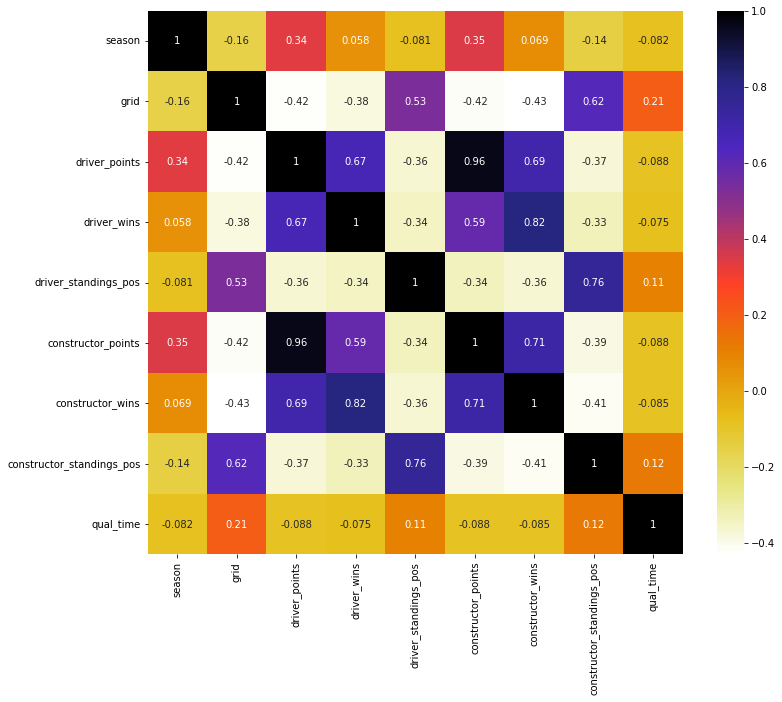

In [ ]:

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = final_x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
#plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train_temp, 0.85) #Features with more than 85 percent correlation with any of the other features
len(set(corr_features))

1

In [ ]:
corr_features # we observe a high correlation (>85 percent) between constructor points and constructor position

{'constructor_points'}

In [ ]:
x_train_modified = final_x_train.drop(corr_features,axis=1) # Therefore, we will drop ths highly correlated feature from the original dataset
x_test_modified = final_x_test.drop(corr_features,axis=1)

In [ ]:
x_train_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13475 entries, 0 to 13474
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     13475 non-null  int64  
 1   grid                       13475 non-null  int64  
 2   driver_points              13475 non-null  int64  
 3   driver_wins                13475 non-null  int64  
 4   driver_standings_pos       13475 non-null  int64  
 5   constructor_wins           13475 non-null  int64  
 6   constructor_standings_pos  13475 non-null  int64  
 7   qual_time                  13475 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 842.3 KB


In [ ]:
x_test_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     798 non-null    int64  
 1   grid                       798 non-null    int64  
 2   driver_points              798 non-null    int64  
 3   driver_wins                798 non-null    int64  
 4   driver_standings_pos       798 non-null    int64  
 5   constructor_wins           798 non-null    int64  
 6   constructor_standings_pos  798 non-null    int64  
 7   qual_time                  798 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 50.0 KB






Conclusions:-


From Mutual Information or Information Gain feature selection framework




# Classification

In [ ]:
import pandas as pd
import csv,os,re,sys,codecs
import numpy as np
import matplotlib.pyplot as plt
import joblib,  statistics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter


In [ ]:
df_train=pd.concat([x_train_modified,y_train],axis=1) #Aggregated Dataframe
df_train

,season,grid,driver_points,driver_wins,driver_standings_pos,constructor_wins,constructor_standings_pos,qual_time,podium
0,1983,1,0,0,0,0,0,76.959,15
1,1983,2,0,0,0,0,0,77.105,6
2,1983,3,0,0,0,0,0,77.191,4
3,1983,4,0,0,0,0,0,77.547,1
4,1983,5,0,0,0,0,0,77.639,7
...,...,...,...,...,...,...,...,...,...
13470,2019,16,14,0,17,0,8,80.294,16
13471,2019,17,43,0,12,0,8,80.563,13
13472,2019,18,0,0,20,0,10,80.897,17
13473,2019,19,1,0,19,0,10,81.416,19


In [ ]:
#a score function calculates differnet metrics like macro. micro precison and recall and f-measure from confusion matrix
def score_function(confusion_list):

  precision_score_0=confusion_list[0][0]/(confusion_list[0][0]+confusion_list[1][0])
  
  recall_score_0= confusion_list[0][0]/(confusion_list[0][0]+confusion_list[0][1])
  
  precision_score_1 = confusion_list[1][1]/(confusion_list[1][1]+confusion_list[0][1])

  recall_score_1 = confusion_list[1][1]/(confusion_list[1][1]+confusion_list[1][0])
  
  return precision_score_0,recall_score_0, precision_score_1 , recall_score_1 

In [ ]:
#scores = []


# This is the pipeline

class data_classification():
     def __init__(self,path=df_train,clf_opt='lr',no_of_selected_features=None):
        self.path = path
        self.clf_opt=clf_opt
        self.no_of_selected_features=no_of_selected_features
        if self.no_of_selected_features!=None:
            self.no_of_selected_features=int(self.no_of_selected_features)  
# Selection of classifiers  
     def classification_pipeline(self):    
    # AdaBoost 
        if self.clf_opt=='ab':
            print('\n\t### Training AdaBoost Classifier ### \n')
            be1 = svm.SVC(kernel='linear', class_weight='balanced',probability=True)              
            be2 = LogisticRegression(solver='liblinear',class_weight='balanced') 
            be3 = DecisionTreeClassifier(max_depth=50)
#            clf = AdaBoostClassifier(algorithm='SAMME',n_estimators=100)            
            clf = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100)
            clf_parameters = {
            'clf__base_estimator':(be1,be2,be3),
            'clf__random_state':(0,10),
            }      
    # Decision Tree
        elif self.clf_opt=='dt':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = DecisionTreeClassifier(random_state=40) 
            clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__max_depth':(10,40,45,60),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1),
            } 
    # Logistic Regression 
        elif self.clf_opt=='lr':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = LogisticRegression(solver='liblinear',class_weight='balanced') 
            clf_parameters = {
            'clf__random_state':(0,10),
            } 
    # Linear SVC 
       # elif self.clf_opt=='ls':   
       #     print('\n\t### Training Linear SVC Classifier ### \n')
       #     clf = svm.LinearSVC(class_weight='balanced')  
       #     clf_parameters = {
       #     'clf__C':(0.1,1,100),
       #     }         
    # Multinomial Naive Bayes
        elif self.clf_opt=='nb':
            print('\n\t### Training Multinomial Naive Bayes Classifier ### \n')
            clf = MultinomialNB(fit_prior=True, class_prior=None)  
            clf_parameters = {
            'clf__alpha':(0,1),
            }            
    # Random Forest 
        elif self.clf_opt=='rf':
            print('\n\t ### Training Random Forest Classifier ### \n')
            clf = RandomForestClassifier(class_weight='balanced', n_jobs = -1)
            clf_parameters = {
            'clf__criterion':('entropy','gini'),       
            'clf__n_estimators':(30,50,100),
            'clf__max_depth':(10,20,30,50,100,200),
            'clf__max_features':('auto', 'sqrt', 'log2')
            }    
    #k nearest neighbours
        elif self.clf_opt=='knn':
            print('\n\t ### Training k nearest neighbour Classifier ### \n')
            clf = KNeighborsClassifier()
            clf_parameters = { 
                'clf_n_neighbors' : [5,7,9,11,13,15],
               'clf_weights' : ['uniform','distance'],
               'clf_metric' : ['minkowski','euclidean','manhattan']}

          
    # Support Vector Machine  
        elif self.clf_opt=='svm': 
            print('\n\t### Training SVM Classifier ### \n')
            clf = svm.SVC(class_weight='balanced',probability=True)  
            clf_parameters = {
            'clf__C':(0.1,1,100),
            'clf__kernel':['rbf']#'poly','sigmoid','linear
            }
        else:
            print('Select a valid classifier \n')
            sys.exit(0)        
        return clf,clf_parameters     
# Load the data 
     def get_data(self):
        #fl=open(self.path+'winequality_white.csv',"r")  
        #reader = list(csv.reader(fl,delimiter='\n')) 
        #fl.close()
        #data=[]; labels=[];
        #for item in reader[1:]:
        #    item=''.join(item).split(';')
        #    labels.append(item[-1]) 
        #    data.append(item[:-1])
        # labels=[int(''.join(item)) for item in labels]
        #data=np.asarray(data)
        #print('Class  Names: '+','.join(list(Counter(labels).keys())))
        #no_of_members=','.join([str(item) for item in list(Counter(labels).values())])
        #print('Number of Members in Individual Classes: '+ no_of_members)   
        
        labels=df_train['podium']
        data=df_train.drop(['podium'],axis=1)                             
        # Training and Test Split           
        trn_data, tst_data, trn_cat, tst_cat = train_test_split(data, labels, test_size=0.25, random_state=42,stratify=labels)   

        # ftrn = open(self.path+"training_data.csv", "r")
        # trn_data = list(csv.reader(ftrn,delimiter=',',quoting=csv.QUOTE_NONNUMERIC)) 
        # ftrn.close()
        
        # ftrn = open(self.path+"training_data_class_labels.csv", "r")
        # reader = list(csv.reader(ftrn,delimiter='\n'))
        # trn_cat=[int(''.join(item)) for item in reader] 
        # ftrn.close()
        
        # ftst = open(self.path+"test_data.csv", "r")
        # tst_data = list(csv.reader(ftst,delimiter=',',quoting=csv.QUOTE_NONNUMERIC))
        # ftst.close()
        
        # ftst = open(self.path+"test_data_class_labels.csv", "r")
        # reader = list(csv.reader(ftst,delimiter='\n'))
        # tst_cat=[int(''.join(item)) for item in reader] 
        # ftst.close()
        
        return trn_data, tst_data, trn_cat, tst_cat
    
# Classification using the Gold Statndard after creating it from the raw text    
     def classification(self):  
   # Get the data
        trn_data, tst_data, trn_cat, tst_cat=self.get_data()

        clf,clf_parameters=self.classification_pipeline()
        pipeline = Pipeline([
                             ('clf', clf)])        #('feature_selection', SelectKBest(mutual_info_classif, k=self.no_of_selected_features))
        grid = GridSearchCV(pipeline,clf_parameters,scoring='f1_micro',cv=10)          
        grid.fit(trn_data,trn_cat)     
        clf= grid.best_estimator_  
        #print('\n\n The best set of parameters of the pipiline are: ')
        #print(clf)     
        #joblib.dump(clf, self.path+'trn_model.joblib')
        predicted=clf.predict(tst_data)

        

        #predicted_proba = clf.predict_proba(tst_data)
    # Evaluation
        #class_names=list(Counter(tst_cat).keys())
        #class_names = [str(x) for x in class_names] 
        #print('\n The classes are: ')
        #print(class_names) 
    # Evaluation
        print('\n *************** Confusion Matrix ***************  \n')
        cm = confusion_matrix(tst_cat, predicted)
    
        print(cm) 

       
       # class_names=list(Counter(tst_cat).keys())
        class_names = [str(x) for x in Counter(tst_cat).keys()]        
        print('\n ***************  Scores on Test Data  *************** \n ')
        print(classification_report(tst_cat, predicted, target_names=class_names)) 
        
       # scores.append({
      
       #'best_score' : grid.best_score_,
      
       #'best_params' : grid.best_params_ ,

       #'predicted_proba' : predicted_proba

   #       })
        
        
        return  cm

#Code Execution

In [ ]:
models = ['rf'] #random forest lassifier

In [ ]:
for i in models :
  f1_classifier = data_classification(df_train,clf_opt= i)
  x=f1_classifier.classification()
  t=score_function(x)
 



	 ### Training Random Forest Classifier ### 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,



 *************** Confusion Matrix ***************  

[[92 23 14  8  7  0  2  0  1  0  0  2  0  1  0  0  0  0  0  0  0  0  1  0
   1  0  0]
 [42 40 30 12  8  0  2  2  1  0  0  1  1  0  0  0  2  0  1  0  0  1  5  1
   2  0  0]
 [24 28 32 14 10  7  4  1  2  1  1  1  0  0  0  0  0  0  1  0  1  2  5  8
   9  0  0]
 [12 20 28 21 10  9 10  5  1  0  1  0  3  0  1  0  0  1  0  0  0  1  9  7
   6  4  0]
 [ 6 13 20 15 19 13 13  4  5  5  2  1  1  1  1  0  0  1  1  0  1  1  5  6
  10  6  0]
 [ 1  7  9  6 16 16 20  9  6  9  2  5  0  0  3  2  0  0  1  0  1  3  4  7
  15  7  0]
 [ 2  4  4  9  7 10 16 15  6 12  5  3  2  1  2  2  0  1  0  0  0  3  8 13
  15 11  0]
 [ 1  2  5  8 12 10 20 10  3  7  2  7  5  3  1  4  0  1  0  0  2  1  6  2
  26  9  0]
 [ 1  4  4  1  5 14 17  7  7  9  6  3 10  3  1  1  1  2  0  1  1  2  7 10
  20 10  0]
 [ 0  3  3  5  5  1 17 12  5 14  3  4 11  1  3  6  2  5  2  1  1  2  5  9
  13 14  0]
 [ 3  3  2  3  2  4  7  5  7  9  8 11 14  3 10  5  2  2  2  1  0  3  3  5
  22 12  0]


In [ ]:
models2=['svm']

In [ ]:
for i in models2 :
  f1_classifier = data_classification(df_train,clf_opt= i)
  x=f1_classifier.classification()
  t=score_function(x)


	### Training SVM Classifier ### 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,



 *************** Confusion Matrix ***************  

[[41 54  5 16  4  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  14  3  8]
 [41 34  9 20  2  5  5  0  0  0  0  0  2  0  2  0  0  0  0  0  0  2  0  0
  13  8  8]
 [24 29  5 31  1 12  3  0  0  0  0  0  6  0  1  0  0  0  0  0  0  2  2  0
  15 11  9]
 [19 21  8 22  4 18  8  0  0  0  0  0  5  0  5  0  0  0  0  0  2  1  2  0
  14 17  3]
 [10  6  9 22  7 14 11  0  0  0  0  0 12  0 11  0  0  0  0  0  0  3  3  2
  20 15  5]
 [ 0  4  3 13  8 16 16  0  0  1  0  0 12  0 14  0  0  0  0  0  3  6  1  3
  18 26  5]
 [ 3  3  5  4  5  7  8  0  0  1  0  0 16  0 25  0  0  0  0  0  3  7  1  2
  19 41  1]
 [ 2  3  4  6  3  8 22  0  0  0  0  0 17  0 25  0  0  0  0  0  2  3  2  1
  11 37  1]
 [ 2  4  0  3  2  6 16  0  0  1  0  0 17  0 28  0  0  0  0  0  4  2  4  2
  11 42  3]
 [ 1  0  1  1  3  5 13  0  0  1  0  0 17  0 42  0  0  0  0  0  7  3  1  2
   6 43  1]
 [ 1  3  0  3  2  1 10  0  0  0  0  0 11  0 55  0  0  0  0  0  5  2  1  0
   6 45  3]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models3= ['nb','dt','lr']
for i in models3 :
  f1_classifier = data_classification(df_train,clf_opt= i)
  x=f1_classifier.classification()
  t=score_function(x)


	### Training Multinomial Naive Bayes Classifier ### 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e


 *************** Confusion Matrix ***************  

[[61 24  9 14  1  5  9  0  3  0  0  0  0  1  0  0  1  0  1  0  0  1  0  0
  20  1  1]
 [45 15 12 17  6  8  9  3  5  0  1  0  2  0  0  0  1  0  1  0  0  3  0  0
  22  1  0]
 [30 10  8 16 11 13 12  1  6  1  0  0  7  0  0  0  1  1  0  0  0  9  0  0
  25  0  0]
 [23 16  9  9 13  5 12  7  8  0  0  0  8  1  1  0  5  0  0  0  0  4  0  0
  22  6  0]
 [18  6 13  6  8 11  8  8  9  2  1  0  9  1  1  0  6  1  1  0  0  2  0  0
  35  4  0]
 [ 4  4 12  6 14 10  5 10  8  2  0  0  9  0  1  0  9  1  0  0  0  0  0  0
  49  5  0]
 [ 5  6  5  2  5  8  8  8 10  2  0  0 21  0  2  0  3  0  0  0  0  3  0  0
  45 18  0]
 [ 7  2  6  5  7 13  6  8  7  0  1  0 10  0  2  0  5  0  0  1  0  2  0  0
  44 21  0]
 [ 4  0  6  3  5  8  8 10  7  1  1  0  9  0  4  0  5  2  0  1  0  3  0  0
  43 27  0]
 [ 2  0  3  2  9  4  3  7  6  0  3  0 12  0  1  0  5  0  0  1  0  0  0  0
  56 33  0]
 [ 2  2  1  1  6 12  3  7  5  2  0  2 10  1  3  0  1  0  0  1  0  0  0  0
  57 32  0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_spl


 *************** Confusion Matrix ***************  

[[79 43 12  0  0  4 12  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [32 75 16  0  0  8 14  0  2  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [17 67 26  0  0 12 21  0  4  0  0  0  3  0  1  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 8 53 25  0  0 12 35  0  6  0  0  0  6  0  3  1  0  0  0  0  0  0  0  0
   0  0  0]
 [ 3 44 17  0  0 20 43  0  8  0  0  0 10  0  3  2  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0 27 19  0  0  5 55  0 13  0  0  0 19  0  8  3  0  0  0  0  0  0  0  0
   0  0  0]
 [ 2 16 22  0  0  4 53  0 22  0  0  0 20  0 11  1  0  0  0  0  0  0  0  0
   0  0  0]
 [ 1 21 14  0  0  5 50  0 17  0  0  0 24  0 11  4  0  0  0  0  0  0  0  0
   0  0  0]
 [ 2  9 13  0  0  5 50  0 24  0  0  0 33  0 11  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 1  8 12  0  0  3 51  0 16  0  0  0 28  0 18 10  0  0  0  0  0  0  0  0
   0  0  0]
 [ 4 12 12  0  0  4 31  0 20  0  0  0 44  0 16  5  0  0  0  0  0  0  0  0
   0  0  0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_spl


 *************** Confusion Matrix ***************  

[[106  18   9   6   1   3   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   1   1   0   4   0   2]
 [ 74  15  23  15   3   7   2   0   0   0   0   0   0   1   0   0   0   0
    0   1   0   0   0   0   5   0   5]
 [ 39  25  32  20   4  11   3   3   0   3   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   5   0   5]
 [ 19  25  34  17   8  16   4   3   1   5   0   0   1   3   0   0   0   0
    0   1   0   0   0   0   7   4   1]
 [ 14  10  25  28  10  24   8   7   0   4   0   0   2   2   0   0   1   0
    0   0   0   4   1   0   4   4   2]
 [  3  10  10  11  10  40   7  11   1   7   1   0   0   0   0   0   1   0
    1   0   0   8   1   0  18   6   3]
 [  4   3   8  13   5  26  10  16   0  15   0   0   0   5   1   0   5   0
    0   0   0   8   0   1   9  18   4]
 [  3   3   9  13   9  23   1  11   1  14   0   0   0   4   1   0   2   0
    0   1   1   8   1   1  18  19   4]
 [  4   3   1   3   8  22   1  23   0  18 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Testing Phase for Multi Label Classification 

We'll be using Multinomial Naive Bayes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB 

In [ ]:
df = x_train[['season','round' ,'grid', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qual_time']]
#scaler = StandardScaler()

In [ ]:
df

,season,round,grid,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qual_time
0,1983,1,1,0,0,0,0,0,0,76.959
1,1983,1,2,0,0,0,0,0,0,77.105
2,1983,1,3,0,0,0,0,0,0,77.191
3,1983,1,4,0,0,0,0,0,0,77.547
4,1983,1,5,0,0,0,0,0,0,77.639
...,...,...,...,...,...,...,...,...,...,...
13470,2019,21,16,14,0,17,57,0,8,80.294
13471,2019,21,17,43,0,12,57,0,8,80.563
13472,2019,21,18,0,0,20,1,0,10,80.897
13473,2019,21,19,1,0,19,1,0,10,81.416


In [ ]:
clf.fit(df,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, class_weight='balanced', probability=True)

In [ ]:
df_test = x_test[['season','round' ,'grid', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qual_time']]    

In [ ]:
clf_3 = MultinomialNB(fit_prior=True, class_prior=None, alpha = 1).fit(df,y_train)  
            

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf_3.predict(df_test) # Labels Generated for Multi class model

In [ ]:
df_test_modified = x_test[['season','round' ,'grid','driver', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qual_time']]

Lets extract the winner using Winner Extractor for our test set

In [ ]:
def Winner_extractor(df):
  Winners = []
  for i in df['season'].unique() :
    for circuit in df[df.season == i]['round'].unique():
      test = df[(df.season == i) & (df['round'] == circuit)]
      X_test = test.drop(['driver'], axis = 1)
 
     # X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        # make predictions
      prediction_df = pd.DataFrame(clf_3.predict_proba(X_test), columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27'])

      prediction_df= pd.concat([prediction_df, df['driver']],axis=1)
      prediction_df.sort_values('1', ascending = False, inplace = True)
      prediction_df.reset_index(inplace = True, drop = True)
    
      Winners.append({ 
             'round' : circuit   ,
             'season' : i ,
             'driver'      : prediction_df.iloc[0]['driver'],
                 })
      
     



    
  
  return(pd.DataFrame.from_dict(Winners)) 

In [ ]:
Winner_extractor(df_test_modified) # These are my predicted winners for each round in each season in x_test

,round,season,driver
0,1,1998,hakkinen
1,2,1998,hakkinen
2,3,1998,michael_schumacher
3,4,1998,coulthard
4,5,1998,hakkinen
5,6,1998,hakkinen
6,7,1998,coulthard
7,8,1998,hakkinen
8,9,1998,hakkinen
9,10,1998,michael_schumacher


##Binary classification : One vs. Many Model

In [ ]:
df_btrain=df_train

In [ ]:
df_btrain.podium = df_btrain.podium.map(lambda x: 1 if x == 1 else 0)

In [ ]:
#checking distribution of our class labels  
df_btrain[['podium']].describe()

,podium
count,13475.000000
mean,0.045121
std,0.207576
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df_btrain[['podium']]

,podium
0,0
1,0
2,0
3,1
4,0
...,...
13470,0
13471,0
13472,0
13473,0


In [ ]:
scores = []


# This is the pipeline

class data_classification():
     def __init__(self,path=df_train,clf_opt='lr',no_of_selected_features=None):
        self.path = path
        self.clf_opt=clf_opt
        self.no_of_selected_features=no_of_selected_features
        if self.no_of_selected_features!=None:
            self.no_of_selected_features=int(self.no_of_selected_features)  
# Selection of classifiers  
     def classification_pipeline(self):    
    # AdaBoost 
        if self.clf_opt=='ab':
            print('\n\t### Training AdaBoost Classifier ### \n')
            be1 = svm.SVC(kernel='linear', class_weight='balanced',probability=True)              
            be2 = LogisticRegression(solver='liblinear',class_weight='balanced') 
            be3 = DecisionTreeClassifier(max_depth=50)
#            clf = AdaBoostClassifier(algorithm='SAMME',n_estimators=100)            
            clf = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100)
            clf_parameters = {
            'clf__base_estimator':(be1,be2,be3),
            'clf__random_state':(0,10),
            }      
    # Decision Tree
        elif self.clf_opt=='dt':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = DecisionTreeClassifier(random_state=40) 
            clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__max_depth':(10,40,45,60),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1),
            } 
    # Logistic Regression 
        elif self.clf_opt=='lr':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = LogisticRegression(solver='liblinear',class_weight='balanced') 
            clf_parameters = {
            'clf__random_state':(0,10),
            } 
    # Linear SVC 
       # elif self.clf_opt=='ls':   
       #     print('\n\t### Training Linear SVC Classifier ### \n')
       #     clf = svm.LinearSVC(class_weight='balanced')  
       #     clf_parameters = {
       #     'clf__C':(0.1,1,100),
       #     }         
    # Multinomial Naive Bayes
        elif self.clf_opt=='nb':
            print('\n\t### Training Multinomial Naive Bayes Classifier ### \n')
            clf = MultinomialNB(fit_prior=True, class_prior=None)  
            clf_parameters = {
            'clf__alpha':(0,1),
            }            
    # Random Forest 
        elif self.clf_opt=='rf':
            print('\n\t ### Training Random Forest Classifier ### \n')
            clf = RandomForestClassifier(class_weight='balanced', n_jobs = -1)
            clf_parameters = {
            'clf__criterion':('entropy','gini'),       
            'clf__n_estimators':(30,50,100),
            'clf__max_depth':(10,20,30,50,100,200),
            'clf__max_features':('auto', 'sqrt', 'log2')
            }    
    #k nearest neighbours
        elif self.clf_opt=='knn':

            print('\n\t ### Training k nearest neighbour Classifier ### \n')
            clf = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None,
                                           p=2,
                                            )
            clf_parameters = { 
                'clf__n_neighbors' : [5,7,9,11,13,15],
               'clf__weights' : ['uniform','distance'],
               'clf__metric' : ['minkowski','euclidean','manhattan']}

          
    # Support Vector Machine  
        elif self.clf_opt=='svm': 
            print('\n\t### Training SVM Classifier ### \n')
            clf = svm.SVC(class_weight='balanced',probability=True)  
            clf_parameters = {
            'clf__C':(0.1,1,100),
            'clf__kernel':['rbf']#'poly','sigmoid','linear
            }
        else:
            print('Select a valid classifier \n')
            sys.exit(0)        
        return clf,clf_parameters     
# Load the data 
     def get_data(self):
        #fl=open(self.path+'winequality_white.csv',"r")  
        #reader = list(csv.reader(fl,delimiter='\n')) 
        #fl.close()
        #data=[]; labels=[];
        #for item in reader[1:]:
        #    item=''.join(item).split(';')
        #    labels.append(item[-1]) 
        #    data.append(item[:-1])
        # labels=[int(''.join(item)) for item in labels]
        #data=np.asarray(data)
        #print('Class  Names: '+','.join(list(Counter(labels).keys())))
        #no_of_members=','.join([str(item) for item in list(Counter(labels).values())])
        #print('Number of Members in Individual Classes: '+ no_of_members)   
        
        labels=df_btrain['podium']
        data=df_btrain.drop(['podium'],axis=1)                             
        # Training and Test Split           
        trn_data, tst_data, trn_cat, tst_cat = train_test_split(data, labels, test_size=0.25, random_state=42,stratify=labels)   

        # ftrn = open(self.path+"training_data.csv", "r")
        # trn_data = list(csv.reader(ftrn,delimiter=',',quoting=csv.QUOTE_NONNUMERIC)) 
        # ftrn.close()
        
        # ftrn = open(self.path+"training_data_class_labels.csv", "r")
        # reader = list(csv.reader(ftrn,delimiter='\n'))
        # trn_cat=[int(''.join(item)) for item in reader] 
        # ftrn.close()
        
        # ftst = open(self.path+"test_data.csv", "r")
        # tst_data = list(csv.reader(ftst,delimiter=',',quoting=csv.QUOTE_NONNUMERIC))
        # ftst.close()
        
        # ftst = open(self.path+"test_data_class_labels.csv", "r")
        # reader = list(csv.reader(ftst,delimiter='\n'))
        # tst_cat=[int(''.join(item)) for item in reader] 
        # ftst.close()
        
        return trn_data, tst_data, trn_cat, tst_cat
    
# Classification using the Gold Statndard after creating it from the raw text    
     def classification(self):  
   # Get the data
        trn_data, tst_data, trn_cat, tst_cat=self.get_data()

        clf,clf_parameters=self.classification_pipeline()
        pipeline = Pipeline([
                             ('clf', clf)])        #('feature_selection', SelectKBest(mutual_info_classif, k=self.no_of_selected_features))
        grid = GridSearchCV(pipeline,clf_parameters,scoring='f1_micro',cv=10)          
        grid.fit(trn_data,trn_cat)     
        clf= grid.best_estimator_  
        #print('\n\n The best set of parameters of the pipiline are: ')
        #print(clf)     
        #joblib.dump(clf, self.path+'trn_model.joblib')
        predicted=clf.predict(tst_data)

        

        #predicted_proba = clf.predict_proba(tst_data)
    # Evaluation
        #class_names=list(Counter(tst_cat).keys())
        #class_names = [str(x) for x in class_names] 
        #print('\n The classes are: ')
        #print(class_names) 
    # Evaluation
        print('\n *************** Confusion Matrix ***************  \n')
        cm = confusion_matrix(tst_cat, predicted)
    
        print(cm) 

       
       # class_names=list(Counter(tst_cat).keys())
        class_names = [str(x) for x in Counter(tst_cat).keys()]        
        print('\n ***************  Scores on Test Data  *************** \n ')
        print(classification_report(tst_cat, predicted, target_names=class_names)) 
        
        scores.append({
      
       'best_score' : grid.best_score_,
      
       'best_params' : grid.best_params_ ,

#'predicted_proba' : predicted_proba

         })
        
        
        return  cm, scores

In [ ]:
models_binary =['dt','lr']#,'ls','nb','rf','svm']

In [ ]:
def score_function(confusion_list):

  precision_score_0=confusion_list[0][0]/(confusion_list[0][0]+confusion_list[1][0])
  
  recall_score_0= confusion_list[0][0]/(confusion_list[0][0]+confusion_list[0][1])
  
  precision_score_1 = confusion_list[1][1]/(confusion_list[1][1]+confusion_list[0][1])

  recall_score_1 = confusion_list[1][1]/(confusion_list[1][1]+confusion_list[1][0])
  
  return precision_score_0,recall_score_0, precision_score_1 , recall_score_1 

In [ ]:
for i in models_binary:
  f1_classifier = data_classification(df_btrain,clf_opt= i)
  x=f1_classifier.classification()
  t=score_function(x[0])
  for j in scores:
    j.setdefault('model_name', i)
    j.setdefault('precision_score_0',t[0])
    j.setdefault('recall_score_0',t[1])
    j.setdefault('precision_score_1',t[2])
    j.setdefault('recall_score_1',t[3])



	### Training Logistic Regression Classifier ### 


 *************** Confusion Matrix ***************  

[[3217    0]
 [ 152    0]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3217
           1       0.00      0.00      0.00       152

    accuracy                           0.95      3369
   macro avg       0.48      0.50      0.49      3369
weighted avg       0.91      0.95      0.93      3369


	### Training Logistic Regression Classifier ### 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Run


 *************** Confusion Matrix ***************  

[[2726  491]
 [  13  139]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3217
           1       0.22      0.91      0.36       152

    accuracy                           0.85      3369
   macro avg       0.61      0.88      0.64      3369
weighted avg       0.96      0.85      0.89      3369



In [ ]:
scores

[{'best_params': {'clf__ccp_alpha': 0.009,
   'clf__criterion': 'gini',
   'clf__max_depth': 10,
   'clf__max_features': 'auto'},
  'best_score': 0.9548785145576874,
  'model_name': 'dt',
  'precision_score_0': 0.9548827545265658,
  'precision_score_1': nan,
  'recall_score_0': 1.0,
  'recall_score_1': 0.0},
 {'best_params': {'clf__ccp_alpha': 0.009,
   'clf__criterion': 'gini',
   'clf__max_depth': 10,
   'clf__max_features': 'auto'},
  'best_score': 0.9548785145576874,
  'model_name': 'dt',
  'precision_score_0': 0.9548827545265658,
  'precision_score_1': nan,
  'recall_score_0': 1.0,
  'recall_score_1': 0.0},
 {'best_params': {'clf__random_state': 0},
  'best_score': 0.8366308233197207,
  'model_name': 'lr',
  'precision_score_0': 0.995253742241694,
  'precision_score_1': 0.22063492063492063,
  'recall_score_0': 0.8473733291886851,
  'recall_score_1': 0.9144736842105263}]

In [ ]:
models_binary1 =['svm']

In [ ]:
for i in models_binary1:
  f1_classifier = data_classification(df_btrain,clf_opt= i)
  x=f1_classifier.classification()
  t=score_function(x[0])
  for j in scores:
    j.setdefault('model_name', i)
    j.setdefault('precision_score_0',t[0])
    j.setdefault('recall_score_0',t[1])
    j.setdefault('precision_score_1',t[2])
    j.setdefault('recall_score_1',t[3])



	### Training SVM Classifier ### 


 *************** Confusion Matrix ***************  

[[3104  113]
 [ 115   37]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3217
           1       0.25      0.24      0.25       152

    accuracy                           0.93      3369
   macro avg       0.61      0.60      0.60      3369
weighted avg       0.93      0.93      0.93      3369



In [ ]:
scores

[{'best_params': {'clf__ccp_alpha': 0.009,
   'clf__criterion': 'gini',
   'clf__max_depth': 10,
   'clf__max_features': 'auto'},
  'best_score': 0.9548785145576874,
  'model_name': 'dt',
  'precision_score_0': 0.9548827545265658,
  'precision_score_1': nan,
  'recall_score_0': 1.0,
  'recall_score_1': 0.0},
 {'best_params': {'clf__ccp_alpha': 0.009,
   'clf__criterion': 'gini',
   'clf__max_depth': 10,
   'clf__max_features': 'auto'},
  'best_score': 0.9548785145576874,
  'model_name': 'dt',
  'precision_score_0': 0.9548827545265658,
  'precision_score_1': nan,
  'recall_score_0': 1.0,
  'recall_score_1': 0.0},
 {'best_params': {'clf__random_state': 0},
  'best_score': 0.8366308233197207,
  'model_name': 'lr',
  'precision_score_0': 0.995253742241694,
  'precision_score_1': 0.22063492063492063,
  'recall_score_0': 0.8473733291886851,
  'recall_score_1': 0.9144736842105263},
 {'best_params': {'clf__C': 0.1, 'clf__kernel': 'rbf'},
  'best_score': 0.9325141267835981,
  'model_name': 'svm

In [ ]:
models_binary3 =['nb','rf']

In [ ]:
for i in models_binary3:
  f1_classifier = data_classification(df_btrain,clf_opt= i)
  x=f1_classifier.classification()
  t=score_function(x[0])
  for j in scores:
    j.setdefault('model_name', i)
    j.setdefault('precision_score_0',t[0])
    j.setdefault('recall_score_0',t[1])
    j.setdefault('precision_score_1',t[2])
    j.setdefault('recall_score_1',t[3])



	### Training Multinomial Naive Bayes Classifier ### 


 *************** Confusion Matrix ***************  

[[2834  383]
 [  65   87]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      3217
           1       0.19      0.57      0.28       152

    accuracy                           0.87      3369
   macro avg       0.58      0.73      0.60      3369
weighted avg       0.94      0.87      0.90      3369


	 ### Training Random Forest Classifier ### 



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr


 *************** Confusion Matrix ***************  

[[3184   33]
 [ 122   30]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3217
           1       0.48      0.20      0.28       152

    accuracy                           0.95      3369
   macro avg       0.72      0.59      0.63      3369
weighted avg       0.94      0.95      0.94      3369



In [ ]:
scores

[{'best_params': {'clf__metric': 'manhattan',
   'clf__n_neighbors': 13,
   'clf__weights': 'uniform'},
  'best_score': 0.954184857654905,
  'model_name': 'knn',
  'precision_score_0': 0.9590065828845002,
  'precision_score_1': 0.5555555555555556,
  'recall_score_0': 0.9962698165993161,
  'recall_score_1': 0.09868421052631579},
 {'best_params': {'clf__alpha': 0},
  'best_score': 0.8640388400857889,
  'model_name': 'nb',
  'precision_score_0': 0.9775784753363229,
  'precision_score_1': 0.1851063829787234,
  'recall_score_0': 0.8809449797948399,
  'recall_score_1': 0.5723684210526315},
 {'best_params': {'clf__criterion': 'entropy',
   'clf__max_depth': 200,
   'clf__max_features': 'log2',
   'clf__n_estimators': 30},
  'best_score': 0.9545817786526427,
  'model_name': 'rf',
  'precision_score_0': 0.9630973986690865,
  'precision_score_1': 0.47619047619047616,
  'recall_score_0': 0.9897419956481194,
  'recall_score_1': 0.19736842105263158}]

In [ ]:
models_binary5 =['knn']
for i in models_binary5:
  f1_classifier = data_classification(df_btrain,clf_opt= i)
  x=f1_classifier.classification()
  t=score_function(x[0])
  for j in scores:
    j.setdefault('model_name', i)
    j.setdefault('precision_score_0',t[0])
    j.setdefault('recall_score_0',t[1])
    j.setdefault('precision_score_1',t[2])
    j.setdefault('recall_score_1',t[3])



	 ### Training k nearest neighbour Classifier ### 


 *************** Confusion Matrix ***************  

[[3205   12]
 [ 137   15]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3217
           1       0.56      0.10      0.17       152

    accuracy                           0.96      3369
   macro avg       0.76      0.55      0.57      3369
weighted avg       0.94      0.96      0.94      3369



In [ ]:
scores

[{'best_params': {'clf__metric': 'manhattan',
   'clf__n_neighbors': 13,
   'clf__weights': 'uniform'},
  'best_score': 0.954184857654905,
  'model_name': 'knn',
  'precision_score_0': 0.9590065828845002,
  'precision_score_1': 0.5555555555555556,
  'recall_score_0': 0.9962698165993161,
  'recall_score_1': 0.09868421052631579}]

##Resampling

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import pandas as pd
def re_sampler(dataframe1):
  dataframe2=dataframe1.drop(['podium'],axis=1)
  dataframe3=dataframe1['podium']
  resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
  X_res,y_res=resample.fit_resample(dataframe2,dataframe3)
  df_train_new=pd.concat([X_res,y_res],axis=1)

  return df_train_new



In [ ]:
df_train_copy=df_btrain.copy()

In [ ]:
df_train_copy

,season,grid,driver_points,driver_wins,driver_standings_pos,constructor_wins,constructor_standings_pos,qual_time,podium
0,1983,1,0,0,0,0,0,76.959,0
1,1983,2,0,0,0,0,0,77.105,0
2,1983,3,0,0,0,0,0,77.191,0
3,1983,4,0,0,0,0,0,77.547,1
4,1983,5,0,0,0,0,0,77.639,0
...,...,...,...,...,...,...,...,...,...
13470,2019,16,14,0,17,0,8,80.294,0
13471,2019,17,43,0,12,0,8,80.563,0
13472,2019,18,0,0,20,0,10,80.897,0
13473,2019,19,1,0,19,0,10,81.416,0


In [ ]:
df_new=re_sampler(df_train_copy)
df_new['podium'].value_counts()

1    12867
0    12816
Name: podium, dtype: int64

In [ ]:
def score_function(confusion_list):

  precision_score_0=confusion_list[0][0]/(confusion_list[0][0]+confusion_list[1][0])
  
  recall_score_0= confusion_list[0][0]/(confusion_list[0][0]+confusion_list[0][1])
  
  precision_score_1 = confusion_list[1][1]/(confusion_list[1][1]+confusion_list[0][1])

  recall_score_1 = confusion_list[1][1]/(confusion_list[1][1]+confusion_list[1][0])
  
  return precision_score_0,recall_score_0, precision_score_1 , recall_score_1 

In [ ]:
 scores = []


# This is the pipeline

class data_classification():
     def __init__(self,path=df_train,clf_opt='lr',no_of_selected_features=None):
        self.path = path
        self.clf_opt=clf_opt
        self.no_of_selected_features=no_of_selected_features
        if self.no_of_selected_features!=None:
            self.no_of_selected_features=int(self.no_of_selected_features)  
# Selection of classifiers  
     def classification_pipeline(self):    
    # AdaBoost 
        if self.clf_opt=='ab':
            print('\n\t### Training AdaBoost Classifier ### \n')
            be1 = svm.SVC(kernel='linear', class_weight='balanced',probability=True)              
            be2 = LogisticRegression(solver='liblinear',class_weight='balanced') 
            be3 = DecisionTreeClassifier(max_depth=50)
#            clf = AdaBoostClassifier(algorithm='SAMME',n_estimators=100)            
            clf = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100)
            clf_parameters = {
            'clf__base_estimator':(be1,be2,be3),
            'clf__random_state':(0,10),
            }      
    # Decision Tree
        elif self.clf_opt=='dt':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = DecisionTreeClassifier(random_state=40) 
            clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__max_depth':(10,40,45,60),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1),
            } 
    # Logistic Regression 
        elif self.clf_opt=='lr':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = LogisticRegression(solver='liblinear',class_weight='balanced') 
            clf_parameters = {
            'clf__random_state':(0,10),
            } 
    # Linear SVC 
       # elif self.clf_opt=='ls':   
       #     print('\n\t### Training Linear SVC Classifier ### \n')
       #     clf = svm.LinearSVC(class_weight='balanced')  
       #     clf_parameters = {
       #     'clf__C':(0.1,1,100),
       #     }         
    # Multinomial Naive Bayes
        elif self.clf_opt=='nb':
            print('\n\t### Training Multinomial Naive Bayes Classifier ### \n')
            clf = MultinomialNB(fit_prior=True, class_prior=None)  
            clf_parameters = {
            'clf__alpha':(0,1),
            }            
    # Random Forest 
        elif self.clf_opt=='rf':
            print('\n\t ### Training Random Forest Classifier ### \n')
            clf = RandomForestClassifier(class_weight='balanced', n_jobs = -1)
            clf_parameters = {
            'clf__criterion':('entropy','gini'),       
            'clf__n_estimators':(30,50,100),
            'clf__max_depth':(10,20,30,50,100,200),
            'clf__max_features':('auto', 'sqrt', 'log2')
            }    
    #k nearest neighbours
        elif self.clf_opt=='knn':

            print('\n\t ### Training k nearest neighbour Classifier ### \n')
            clf = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None,
                                           p=2,
                                            )
            clf_parameters = { 
                'clf__n_neighbors' : [5,7,9,11,13,15],
               'clf__weights' : ['uniform','distance']}
               
               #'clf_metric' : ['minkowski','euclidean','manhattan']}

          
    # Support Vector Machine  
        elif self.clf_opt=='svm': 
            print('\n\t### Training SVM Classifier ### \n')
            clf = svm.SVC(class_weight='balanced',probability=True)  
            clf_parameters = {
            'clf__C':(0.1,1,100),
            'clf__kernel':['rbf']#'poly','sigmoid','linear
            }
        else:
            print('Select a valid classifier \n')
            sys.exit(0)        
        return clf,clf_parameters     
# Load the data 
     def get_data(self):
        #fl=open(self.path+'winequality_white.csv',"r")  
        #reader = list(csv.reader(fl,delimiter='\n')) 
        #fl.close()
        #data=[]; labels=[];
        #for item in reader[1:]:
        #    item=''.join(item).split(';')
        #    labels.append(item[-1]) 
        #    data.append(item[:-1])
        # labels=[int(''.join(item)) for item in labels]
        #data=np.asarray(data)
        #print('Class  Names: '+','.join(list(Counter(labels).keys())))
        #no_of_members=','.join([str(item) for item in list(Counter(labels).values())])
        #print('Number of Members in Individual Classes: '+ no_of_members)   
        
        labels=df_new['podium']
        data=df_new.drop(['podium'],axis=1)                             
        # Training and Test Split           
        trn_data, tst_data, trn_cat, tst_cat = train_test_split(data, labels, test_size=0.25, random_state=42,stratify=labels)   

        # ftrn = open(self.path+"training_data.csv", "r")
        # trn_data = list(csv.reader(ftrn,delimiter=',',quoting=csv.QUOTE_NONNUMERIC)) 
        # ftrn.close()
        
        # ftrn = open(self.path+"training_data_class_labels.csv", "r")
        # reader = list(csv.reader(ftrn,delimiter='\n'))
        # trn_cat=[int(''.join(item)) for item in reader] 
        # ftrn.close()
        
        # ftst = open(self.path+"test_data.csv", "r")
        # tst_data = list(csv.reader(ftst,delimiter=',',quoting=csv.QUOTE_NONNUMERIC))
        # ftst.close()
        
        # ftst = open(self.path+"test_data_class_labels.csv", "r")
        # reader = list(csv.reader(ftst,delimiter='\n'))
        # tst_cat=[int(''.join(item)) for item in reader] 
        # ftst.close()
        
        return trn_data, tst_data, trn_cat, tst_cat
    
# Classification using the Gold Statndard after creating it from the raw text    
     def classification(self):  
   # Get the data
        trn_data, tst_data, trn_cat, tst_cat=self.get_data()

        clf,clf_parameters=self.classification_pipeline()
        pipeline = Pipeline([
                             ('clf', clf)])        #('feature_selection', SelectKBest(mutual_info_classif, k=self.no_of_selected_features))
        grid = GridSearchCV(pipeline,clf_parameters,scoring='f1_micro',cv=10)          
        grid.fit(trn_data,trn_cat)     
        clf= grid.best_estimator_  
        #print('\n\n The best set of parameters of the pipiline are: ')
        #print(clf)     
        #joblib.dump(clf, self.path+'trn_model.joblib')
        predicted=clf.predict(tst_data)

        

        #predicted_proba = clf.predict_proba(tst_data)
    # Evaluation
        #class_names=list(Counter(tst_cat).keys())
        #class_names = [str(x) for x in class_names] 
        #print('\n The classes are: ')
        #print(class_names) 
    # Evaluation
        print('\n *************** Confusion Matrix ***************  \n')
        cm = confusion_matrix(tst_cat, predicted)
    
        print(cm) 

       
       # class_names=list(Counter(tst_cat).keys())
        class_names = [str(x) for x in Counter(tst_cat).keys()]        
        print('\n ***************  Scores on Test Data  *************** \n ')
        print(classification_report(tst_cat, predicted, target_names=class_names)) 
        
        scores.append({
      
       'best_score' : grid.best_score_,
      
       'best_params' : grid.best_params_ ,

#'predicted_proba' : predicted_proba

         })
        
        
        return  cm, scores

In [ ]:
models_binary4 =['knn'] #['nb','rf','svc']

In [ ]:
for i in models_binary4:
  f1_classifier = data_classification(df_btrain,clf_opt= i)
  x=f1_classifier.classification()
  t=score_function(x[0])
  for j in scores:
    j.setdefault('model_name', i)
    j.setdefault('precision_score_0',t[0])
    j.setdefault('recall_score_0',t[1])
    j.setdefault('precision_score_1',t[2])
    j.setdefault('recall_score_1',t[3])



	 ### Training k nearest neighbour Classifier ### 


 *************** Confusion Matrix ***************  

[[2894  310]
 [  18 3199]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      3204
           1       0.91      0.99      0.95      3217

    accuracy                           0.95      6421
   macro avg       0.95      0.95      0.95      6421
weighted avg       0.95      0.95      0.95      6421



In [ ]:
scores

[{'best_params': {'clf__n_neighbors': 5, 'clf__weights': 'distance'},
  'best_score': 0.9418022892696616,
  'model_name': 'knn',
  'precision_score_0': 0.9951557093425606,
  'precision_score_1': 0.9071084678561314,
  'recall_score_0': 0.8976279650436954,
  'recall_score_1': 0.9956481193658688}]

##Resampled Binary Classification model test Phase

In [ ]:

df_binary_total = pd.concat([df, y_train], axis=1)

In [ ]:
df_binary_total.podium = df_binary_total.podium.map(lambda x: 1 if x == 1 else 0)


,season,round,grid,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qual_time,podium
0,1983,1,1,0,0,0,0,0,0,76.959,0
1,1983,1,2,0,0,0,0,0,0,77.105,0
2,1983,1,3,0,0,0,0,0,0,77.191,0
3,1983,1,4,0,0,0,0,0,0,77.547,1
4,1983,1,5,0,0,0,0,0,0,77.639,0
...,...,...,...,...,...,...,...,...,...,...,...
13470,2019,21,16,14,0,17,57,0,8,80.294,0
13471,2019,21,17,43,0,12,57,0,8,80.563,0
13472,2019,21,18,0,0,20,1,0,10,80.897,0
13473,2019,21,19,1,0,19,1,0,10,81.416,0


In [ ]:
re_binary_train=re_sampler(df_binary_total)

In [ ]:
labels_binary_train=re_binary_train['podium']

data_binary_train=re_binary_train.drop(['podium'],axis=1)
#labels_binary_train

In [ ]:

clf_binary = KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None,p=2,n_neighbors=5, weights= "distance").fit(data_binary_train,labels_binary_train)

In [ ]:
clf_binary.predict(df_test_binary) 
